In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [91]:
file = "./train.csv"
train_data = pd.read_csv(file)

#Selecting columns
columns = data.columns

In [90]:
#Talk about missing data
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [92]:
#dealing with missing data
clear_data = train_data.drop((missing_data[missing_data['Total'] > 1]).index,1)
clear_data = clear_data.drop(clear_data.loc[clear_data['Electrical'].isnull()].index)
clear_data.isnull().sum().max() #just checking that there's no missing data missing...


0

In [93]:
#deleting points
train_data.sort_values(by = 'GrLivArea', ascending = False)[:2]
train_data = train_data.drop(train_data[train_data['Id'] == 1299].index)
train_data = train_data.drop(train_data[train_data['Id'] == 524].index)

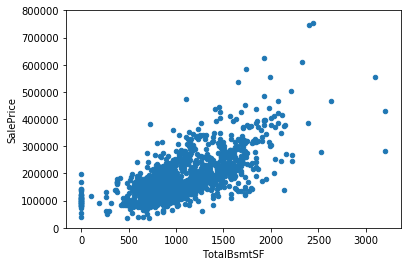

In [94]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

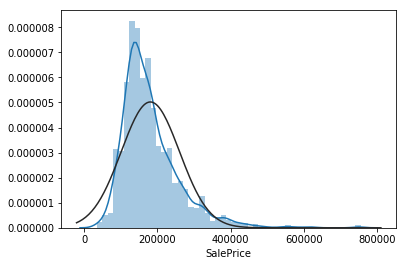

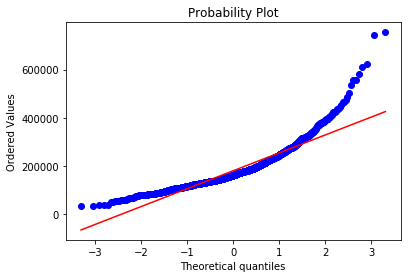

In [95]:
#histogram and normal probability plot
sns.distplot(train_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)

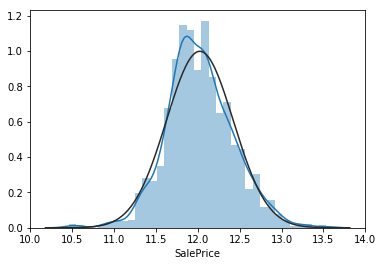

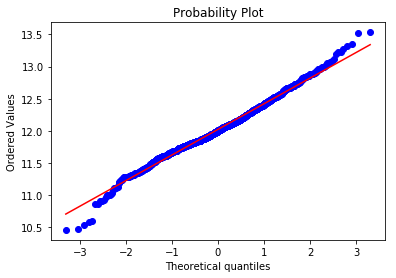

In [96]:
train_data['SalePrice'] = np.log(train_data['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(train_data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['SalePrice'], plot=plt)

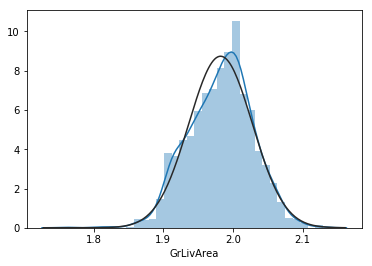

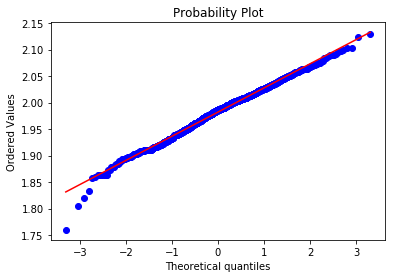

In [98]:
#data transformation
train_data['GrLivArea'] = np.log(train_data['GrLivArea'])
#transformed histogram and normal probability plot
sns.distplot(train_data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data['GrLivArea'], plot=plt)

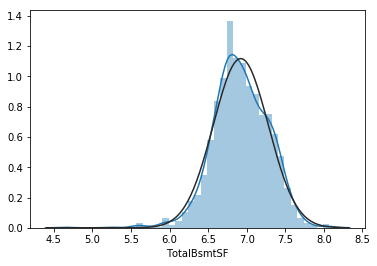

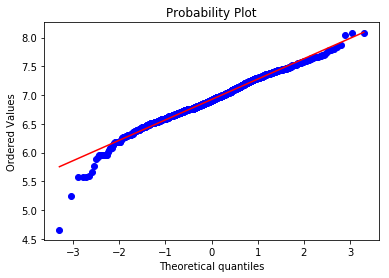

In [99]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train_data['HasBsmt'] = pd.Series(len(train_data['TotalBsmtSF']), index=train_data.index)
train_data['HasBsmt'] = 0 
train_data.loc[train_data['TotalBsmtSF']>0,'HasBsmt'] = 1

#transform data
train_data.loc[train_data['HasBsmt']==1,'TotalBsmtSF'] = np.log(train_data['TotalBsmtSF'])

#histogram and normal probability plot
sns.distplot(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_data[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [101]:
#convert categorical variable into dummy
train_data = pd.get_dummies(train_data)

In [126]:
# Selecting prediction target
y = train_data.SalePrice
features = [ 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea']

#Selecting the data relevant for prediction
X = train_data[features]


In [135]:
#Importing the Learning library
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

model = DecisionTreeRegressor(random_state=1)
model.fit(X, y)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')